In [1]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.fftpack as fft
import scipy.ndimage as img
import scipy.io as spio
import numpy.random as rand
import sklearn.linear_model as skl
import cvxpy as cvx
import tensorflow as tf
from lbfgs import fmin_lbfgs
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

In [3]:
def dct2(x):
    return fft.dct(fft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return fft.idct(fft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

In [4]:
spec = spio.loadmat('spec50.mat')['spec0']

In [5]:
spec.shape

(128, 128)

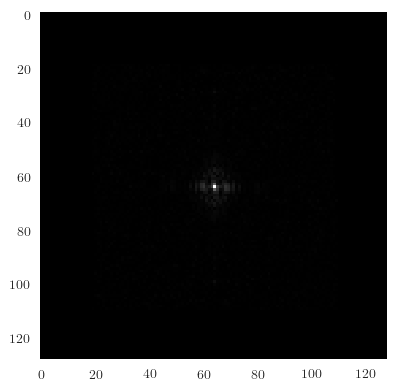

In [6]:
mp.imshow(abs(spec), 'gray')
mp.grid(False)
mp.show()

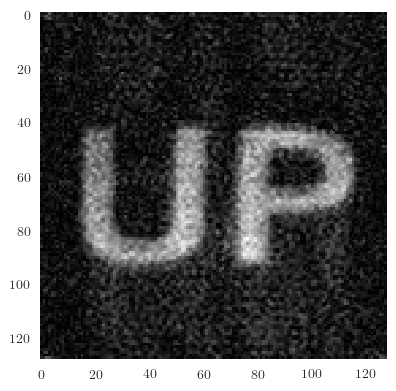

In [7]:
invspec = fft.ifft2(spec)
mp.imshow(abs(invspec), 'gray')
mp.grid(0)
mp.show()

In [21]:
x = abs(invspec.ravel()).astype('float64')
ny, nx = invspec.shape
frac = 0.2
k = np.round(nx * ny * frac).astype(int)
mask = rand.choice([0, 1], size=abs(invspec).shape, p=[1-frac, frac])
comp = abs(invspec)*mask

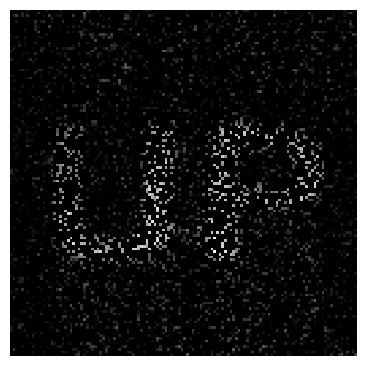

In [24]:
mp.imshow(comp, 'gray')
mp.axis('off')

# mp.savefig('spec50_20cent.png', dpi=300, transparent=True, bbox_inches='tight')
mp.show()

In [27]:
x = abs(invspec.ravel()).astype('float64')
ny, nx = invspec.shape
frac = 0.2
k = np.round(nx * ny * frac).astype(int)
ri = rand.choice(nx*ny, k, replace=False)
b = x.flat[ri]
# b = np.expand_dims(b, axis=1)
A = np.kron(fft.idct(np.identity(nx), norm='ortho', axis=0), fft.idct(np.identity(ny), norm='ortho', axis=0))[ri, :]

vx = cvx.Variable(nx * ny)
objective = cvx.Minimize(cvx.tv(vx))
constraints = [A*vx == b]
prob = cvx.Problem(objective, constraints)
result = prob.solve()
xhat = np.squeeze(np.array(vx.value))
xhat = np.reshape(xhat, (ny, nx))
xhat = idct2(xhat)
np.save('spec50-cvx_tv.npy', xhat)

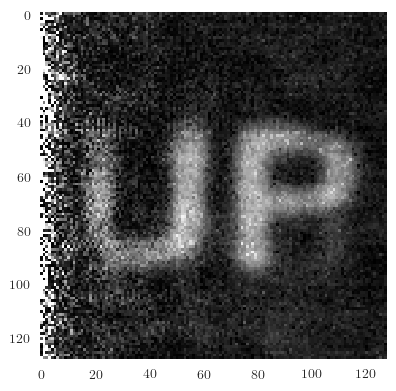

In [27]:
xhat = np.load('spec50-cvx_tv.npy')
mp.imshow(abs(xhat), 'gray', vmin=0, vmax=0.00025)
mp.grid(0)
# mp.savefig('spec50-cvx_tv_constretch.png',
#            dpi=300,
#            bbox_inches='tight')
mp.show()

In [29]:
x = abs(invspec.ravel()).astype('float64')
ny, nx = invspec.shape
frac = 0.2
k = np.round(nx * ny * frac).astype(int)
ri = rand.choice(nx*ny, k, replace=False)
b = x.flat[ri]
# b = np.expand_dims(b, axis=1)
A = np.kron(fft.idct(np.identity(nx), norm='ortho', axis=0), fft.idct(np.identity(ny), norm='ortho', axis=0))[ri, :]

vx = cvx.Variable(nx * ny)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == b]
prob = cvx.Problem(objective, constraints)
result = prob.solve()
xhat = np.squeeze(np.array(vx.value))
xhat = np.reshape(xhat, (ny, nx))
xhat = idct2(xhat)
np.save('spec50-cvx_l1.npy', xhat)

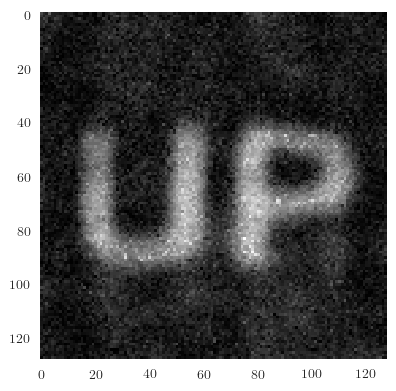

In [30]:
mp.imshow(abs(xhat), 'gray')
mp.grid(0)
# mp.savefig('spec50-cvx_l1.png',
#            dpi=300,
#            bbox_inches='tight')
mp.show()